In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

import utils as ut

# Описание датасета
Number of Instances: 41188 for bank-additional-full.csv

Number of Attributes: 20 + output attribute.
## Input variables:
   1.  **bank client data:**
    * 1 - age (numeric)
    * 2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
    * 3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
    * 4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
    * 5 - default: has credit in default? (categorical: "no","yes","unknown")
    * 6 - housing: has housing loan? (categorical: "no","yes","unknown")
    * 7 - loan: has personal loan? (categorical: "no","yes","unknown")
   2. **related with the last contact of the current campaign:**
    * 8 - contact: contact communication type (categorical: "cellular","telephone")
    * 9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
    * 10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
    * 11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   3. **other attributes:**
    * 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    * 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    * 14 - previous: number of contacts performed before this campaign and for this client (numeric)
    * 15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   4. **social and economic context attributes**
    * 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    * 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    * 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    * 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    * 20 - nr.employed: number of employees - quarterly indicator (numeric)

## Output variable (desired target):
   * 21 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [37]:
df = pd.read_csv("./data/bank-additional-full.csv", sep=";")
print(list(df.columns))
df.drop_duplicates()

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [38]:
# Датасет без пропусков
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

<big>Data processing and Future engineering</big>

In [39]:
# Бинаризация
from sklearn.preprocessing import LabelEncoder

# Бинаризация нескольких столбцов
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])
df["contact"] = le.fit_transform(df["contact"])

In [40]:
# Перевод месяцев и дней в числовой формат
from sklearn.preprocessing import OrdinalEncoder

In [41]:
df["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [42]:
# Преобразование месяцев
ord_e = OrdinalEncoder(categories = [["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]])
df["month"] = ord_e.fit_transform(df["month"].values.reshape(-1, 1))


In [43]:
df["day_of_week"].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [44]:
# Преобразование дней
ord_e = OrdinalEncoder(categories = [["mon", "tue", "wed", "thu", "fri", "sat", "sun"]])
df["day_of_week"] = ord_e.fit_transform(df["day_of_week"].values.reshape(-1, 1))

In [45]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,1,4.0,0.0,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,0,10.0,4.0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,0,10.0,4.0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,0,10.0,4.0,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,0,10.0,4.0,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


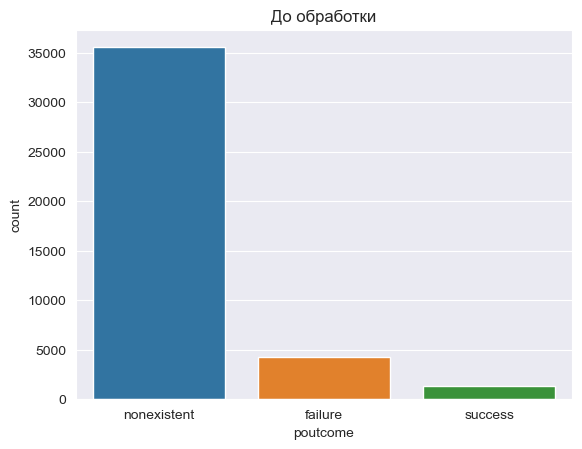

In [46]:
df["poutcome"].unique()
sns.countplot(df, x='poutcome')
plt.title("До обработки")
# Принимаю решение удалить этот столбец
df.drop(columns=["poutcome"], inplace=True)



Text(0.5, 1.0, 'После обработки')

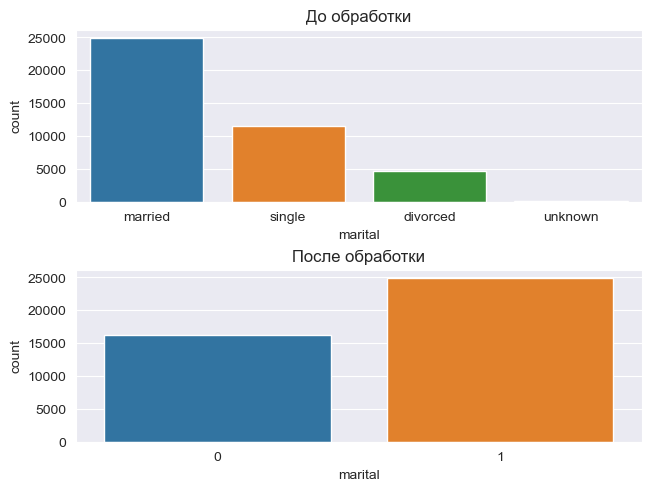

In [47]:
df['marital'].unique()
fig, axes = plt.subplots(2, constrained_layout=True)
sns.countplot(df, x='marital', ax=axes[0]).set_title('До обработки')

# Удалим значения с marital == unknown
df = df.loc[df['marital'] != "unknown"]

# Объединим single и divorced в просто single
dict_to_replace = {"married": 1, "single": 0, "divorced": 0}
df = df.replace({"marital": dict_to_replace})

sns.countplot(df, x='marital', ax=axes[1]).set_title("После обработки")



Text(0.5, 1.0, 'После обработки')

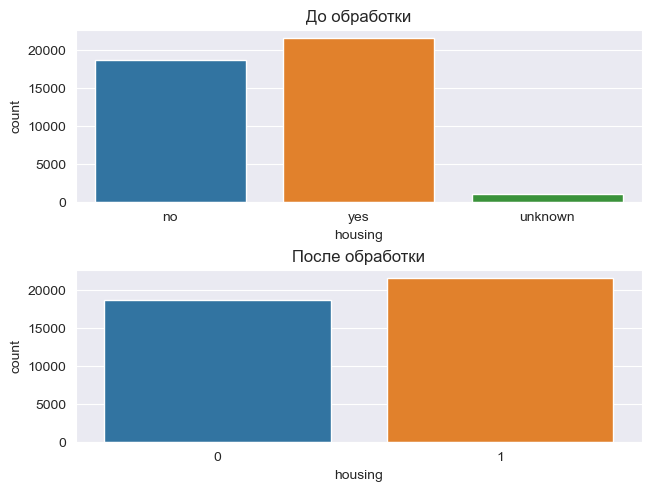

In [48]:
df['housing'].unique()
fig, axes = plt.subplots(2, constrained_layout=True)
sns.countplot(df, x='housing', ax=axes[0]).set_title('До обработки')

# Удалим значения с housing == unknown
df = df.loc[df['housing'] != "unknown"]

df['housing'] = le.fit_transform(df['housing'])
sns.countplot(df, x='housing', ax=axes[1]).set_title('После обработки')

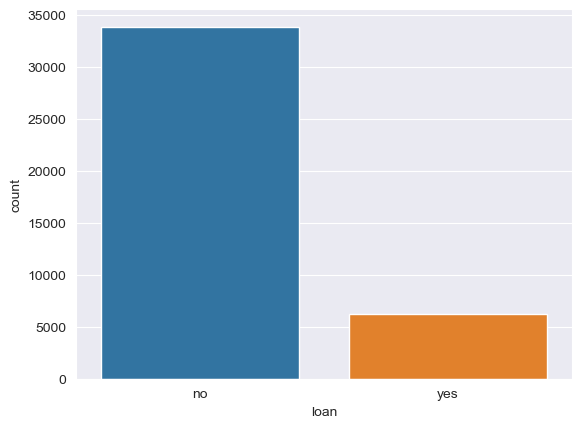

In [49]:
df['loan'].unique()
sns.countplot(df, x='loan')

df['loan'] = le.fit_transform(df['loan'])

In [50]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,no,0,0,1,4.0,0.0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,1,high.school,unknown,0,0,1,4.0,0.0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,no,1,0,1,4.0,0.0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,no,0,0,1,4.0,0.0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,no,0,1,1,4.0,0.0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,1,professional.course,no,1,0,0,10.0,4.0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,1,professional.course,no,0,0,0,10.0,4.0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,1,university.degree,no,1,0,0,10.0,4.0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,1,professional.course,no,0,0,0,10.0,4.0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


Text(0.5, 1.0, 'После обработки')

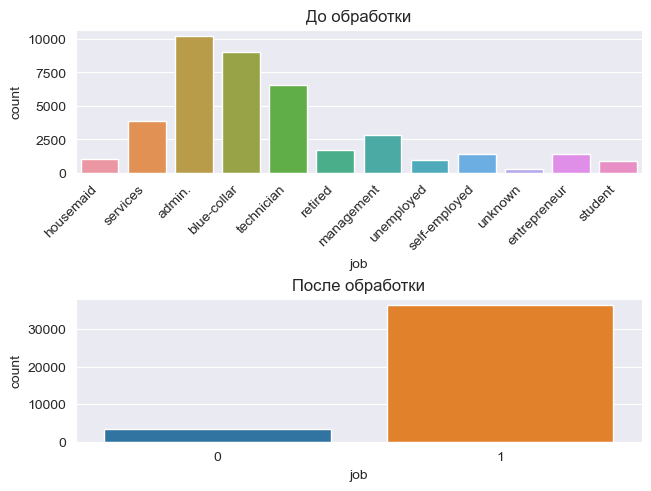

In [51]:
# Бинаризация профессии: 1 - работает, 0 - не работает
df["job"].unique()

fig, axes = plt.subplots(2, constrained_layout=True)

sns.countplot(df, x='job', ax=axes[0]).set_title('До обработки')
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=45, ha='right')

# Удалим значения с job == unknown
df = df.loc[df['job'] != "unknown"]

dict_to_replace = {"housemaid": 1, "services": 1, "admin.": 1, "blue-collar": 1, "technician": 1, "retired": 0, "management": 1, "unemployed": 0, "self-employed": 1, "entrepreneur": 1, "student": 0}
df = df.replace({"job": dict_to_replace})
sns.countplot(df, x='job', ax=axes[1]).set_title('После обработки')



education
university.degree      11821
high.school             9244
basic.9y                5856
professional.course     5100
basic.4y                4002
basic.6y                2204
unknown                 1558
illiterate                18
Name: count, dtype: int64


Text(0.5, 1.0, 'После обработки')

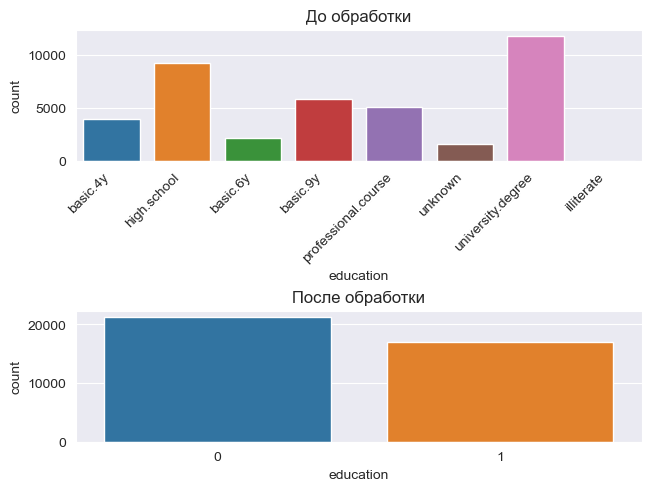

In [52]:
# Перевод образования в числовой формат: 1 - работает, 0 - не работает
df["education"].unique()

fig, axes = plt.subplots(2, constrained_layout=True)

sns.countplot(df, x='education', ax=axes[0]).set_title('До обработки')
axes[0].set_xticks(axes[0].get_xticks(), axes[0].get_xticklabels(), rotation=45, ha='right')
print(df['education'].value_counts())

# Удалим значения с job == unknown
df = df.loc[df['education'] != "unknown"]
df = df.loc[df['education'] != "illiterate"]


dict_to_replace = {"university.degree": 1, "high.school": 0, "basic.9y": 0, "professional.course": 1, "basic.4y": 0, "basic.6y": 0}
df = df.replace({"education": dict_to_replace})
sns.countplot(df, x='education', ax=axes[1]).set_title('После обработки')

default
no         30474
unknown     7750
yes            3
Name: count, dtype: int64


Text(0.5, 1.0, 'После обработки')

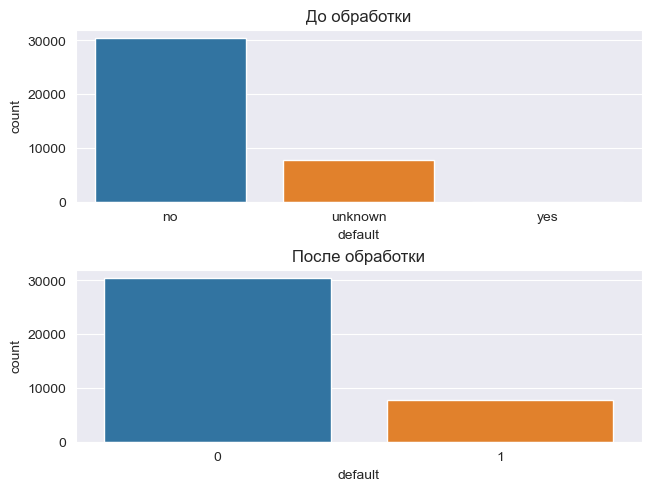

In [53]:
df["default"].unique()
fig, axes = plt.subplots(2, constrained_layout=True)
print(df['default'].value_counts())

sns.countplot(df, x='default', ax=axes[0]).set_title('До обработки')

# Удалим значения с job == unknown
df = df.loc[df['default'] != "yes"]

df['default'] = le.fit_transform(df['default'])
sns.countplot(df, x='default', ax=axes[1]).set_title('После обработки')

In [54]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,1,0,0,0,0,1,4.0,0.0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,1,1,0,1,0,0,1,4.0,0.0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,1,1,0,0,1,0,1,4.0,0.0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,1,0,0,0,0,1,4.0,0.0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,1,1,0,0,0,1,1,4.0,0.0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,1,0,1,0,0,10.0,4.0,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,1,0,0,0,0,10.0,4.0,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,0,1,1,0,1,0,0,10.0,4.0,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,1,1,1,0,0,0,0,10.0,4.0,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1


(array([13890, 17096,  7238], dtype=int64), array([ 17,  35,  50, 100]))


Text(0.5, 1.0, 'После обработки')

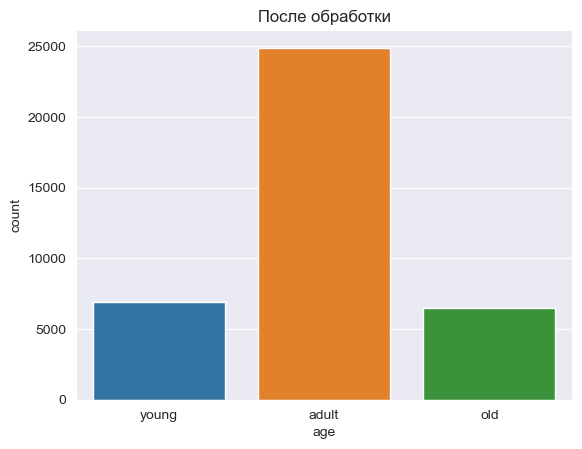

In [55]:
sorted(df["age"].unique())
# print(df['age'].value_counts())

# Узнаем, сколько лежит людей в промежутках: (17-30), (30-50), (50-100) (young, adult, old)
print(np.histogram(df["age"].values, bins=[17,35,50,100]))

cut_labels = ['young', 'adult', 'old']
cut_bins = [17,30,50,100]

df['age'] = pd.cut(df['age'],
                       bins=cut_bins,
                       labels=cut_labels)
df['age'].value_counts()

sns.countplot(df, x='age').set_title('После обработки')





In [56]:
# One Hot Encoding
ohe = OneHotEncoder()
d = ohe.fit_transform(df[['age']])
d = pd.DataFrame(d.toarray(), columns=ohe.categories_[0])
d.drop(d.columns[len(d.columns)-1], axis=1, inplace=True)

# Объединение
df = pd.concat([df, d], axis=1)
df = df.drop('age', axis=1)

In [57]:
# Обработаем pdays: 999 - значит, что не сталкивались с клиентом до этого времени
# print(df['pdays'].value_counts())
# print(print(np.histogram(df["pdays"].values, bins=[0,998,999])))
cut_labels = ['old_client', 'new_client']
cut_bins = [0,998,999]

df['pdays'] = pd.cut(df['pdays'],
                   bins=cut_bins,
                   labels=cut_labels)
print(df['pdays'].value_counts())
df['pdays'] = le.fit_transform(df['pdays'])

pdays
new_client    36859
old_client     1350
Name: count, dtype: int64


In [58]:
df = df.dropna()

y = 0 91.78 % of the dataset
y = 1: 8.22 % of the dataset


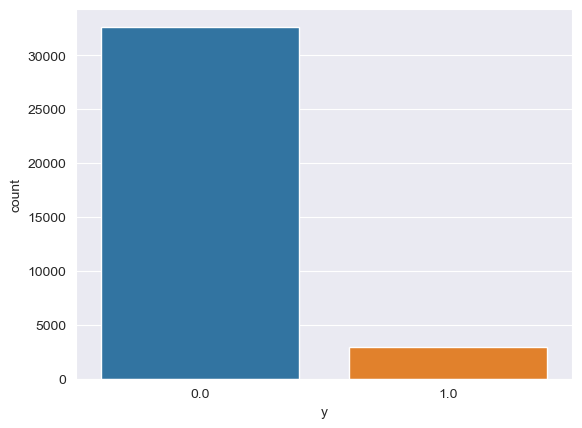

In [59]:
# Датасет является несбалансированным. Исправим это!
# Посмотрим, какой процент мошенничества в датасете
print('y = 0', round(df['y'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('y = 1:', round(df['y'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
sns.countplot(df, x='y')

# Перед тем, как начать балансировать датасет, сделаем копию, чтобы потом на ней проверить обобщающую способность
df_to_test = df.copy()

In [60]:
df = ut.balance_the_dataset(df, 'y')

In [61]:
# plt.figure(figsize=(20,12))
#
# sns.heatmap(df.corr(),
#             cmap='RdBu_r', # задаёт цветовую схему
#             annot=True, # рисует значения внутри ячеек
#             vmin=-1, vmax=1,
#             mask=np.triu(df.corr()))


In [62]:
# sns_plot = sns.pairplot(df, hue='y')

In [63]:
sample = df.sample(n=1000, random_state=42)

df = df.drop(index=sample.index)

sample.to_csv('./data/test.csv')
df.to_csv('./data/train.csv')
